In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

df_nike = pd.read_csv("/Users/beatrizcartiel/Desktop/nike_sales_2024.csv")
df_nike

,Month,Region,Main_Category,Sub_Category,Product_Line,Price_Tier,Units_Sold,Revenue_USD,Online_Sales_Percentage,Retail_Price
0,November,India,Equipment,Bags,Gym Sack,Budget,48356,14506800,73,300
1,January,India,Equipment,Accessories,Hats,Budget,9842,2066820,50,210
2,October,India,Apparel,Tops,Tech Fleece,Mid-Range,25079,1755530,90,70
3,December,Greater China,Footwear,Cricket,Vapor Cricket,Premium,41404,8694840,58,210
4,May,Greater China,Equipment,Socks,Performance Socks,Premium,33569,5371040,53,160
...,...,...,...,...,...,...,...,...,...,...
995,October,India,Equipment,Accessories,Hats,Mid-Range,9870,987000,82,100
996,July,Europe,Equipment,Socks,Performance Socks,Mid-Range,14668,2640240,88,180
997,August,Japan,Footwear,Football,Phantom Vision,Premium,15078,2261700,74,150
998,May,South Korea,Equipment,Socks,Crew Socks,Premium,26242,1312100,52,50


In [19]:
from scipy.stats import pearsonr
import pandas as pd

def get_features_num_regression(df_nike, target_col, umbral_corr=0.5, pvalue=0.05):
    """
    Defino los valores por defecto para el umbral_corr y pvalue asingando automaticmente 0.5 para el umbral de correlaciión y 0.05 para el nivel de significancia. 
    
    Argumentos:
    - df_nike (pd.DataFrame): DataFrame de entrada de los datos
    - target_col (str): Nombre de la columna objetivo
    - umbral_corr (float): Umbral mínimo de correlación absoluta (0 a 1).
    - pvalue (float, opcional): Nivel de significancia para filtrar (1 - p-value). En nuestro caso es de 0.05.

    Returns:
    pd.DataFrame: DataFrame con las columnas seleccionadas y sus estadísticas de correlación.
    """
    # Verifico que df_nike sea un DataFrame válido
    if not isinstance(df_nike, pd.DataFrame):
        raise ValueError("df_nike es un DataFrame válido")

    # Reviso que target_col existe en dicho DataFrame
    if target_col not in df_nike.columns:
        raise ValueError(f"La columna '{target_col}' no está en el DataFrame.")

    # Compruebo que target_col sea numérica continua - ya que es necesiario que sea numérica continua - 
    if not pd.api.types.is_numeric_dtype(df_nike[target_col]):
        raise ValueError(f"'{target_col}' no es numérica")
    if df_nike[target_col].nunique() <= 10:
        raise ValueError(f"'{target_col}' no es continua")

    # Verifico que el umbral_corr esté entre 0 y 1
    if not (0 <= umbral_corr <= 1):
        raise ValueError(" 'umbral_corr' debe estar entre 0 y 1")

    # Miro que pvalue es None o un valor que oscile entre el 0 y 1
    if pvalue is not None and not (0 < pvalue <= 1):
        raise ValueError("El 'pvalue' es None o un valor entre 0 y 1")

    # Selecciono las columnas numéricas - sin contar con el target -
    columnas_numericas = df_nike.select_dtypes(include=['number']).columns
    columnas_numericas = [col for col in columnas_numericas if col != target_col]

    # Hago la lista para guardar los resultados
    resultados = []

    # Calculo las correlaciones y valores p
    for col in columnas_numericas:
        correlacion, p_val = pearsonr(df_nike[col].dropna(), df_nike[target_col].dropna())

        # Aplico los filtros de correlación y significancia
        if abs(correlacion) >= umbral_corr and (pvalue is None or p_val <= pvalue):
            resultados.append({
                "Variable": col,
                "Correlación": correlacion,
                "P-Valor": p_val
            })

    # Creo el DataFrame con los resultados
    if resultados:
        return pd.DataFrame(resultados).sort_values(by="Correlación", ascending=False)
    else:
        print("No se encontraron columnas que cumplan los criterios especificados.")
        return pd.DataFrame(columns=["Variable", "Correlación", "P-Valor"])


In [25]:
# Llamo a la función
resultado = get_features_num_regression(
    df_nike= df_nike,           
    target_col="Revenue_USD",    
    umbral_corr=0.5,             
    pvalue=0.05                 
)

print(resultado)



       Variable  Correlación        P-Valor
0    Units_Sold     0.696539  4.795256e-146
1  Retail_Price     0.665240  8.661735e-129


In [30]:
def plot_features_num_regression(df, target_col, selected_features):
    """
    Lo que hace esta función es generar gráficas para ver la relación entre las features y la variable objetivo

    Argumentos:
    - df_nike (pd.DataFrame): DataFrame de entrada de los datos
    - target_col (str): Nombre de la columna objetivo (tiene que ser numérica).
    - selected_features (list): Lista de variables seleccionadas para hacer el modelo de regresión.

    Returns:
    - Devuelve gráficas de dispersión entre cada variable seleccionada y la variable target
    """
    # Hago las validaciones oportunas
    if not isinstance(df_nike, pd.DataFrame):
        raise ValueError("El argumento 'df_nike' debe ser un DataFrame")
    
    if target_col not in df_nike.columns:
        raise ValueError(f"'{target_col}' no está en el DataFrame")
    
    if not pd.api.types.is_numeric_dtype(df[target_col]):
        raise ValueError(f" '{target_col}' no es numérica")
    
    if not selected_features or not isinstance(selected_features, list):
        raise ValueError("El argumento 'selected_features' debe ser una lista de variables")
    
    # Filtro las variables seleccionadas del DataFrame
    selected_features = [col for col in selected_features if col in df.columns]
    
    if len(selected_features) == 0:
        raise ValueError("No hay variables seleccionadas en el DataFrame")

    for feature in selected_features:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[feature], y=df[target_col], alpha=0.7)
        plt.title(f"Relación entre {feature} y {target_col}")
        plt.xlabel(feature)
        plt.ylabel(target_col)
        plt.grid(True)
        plt.show()

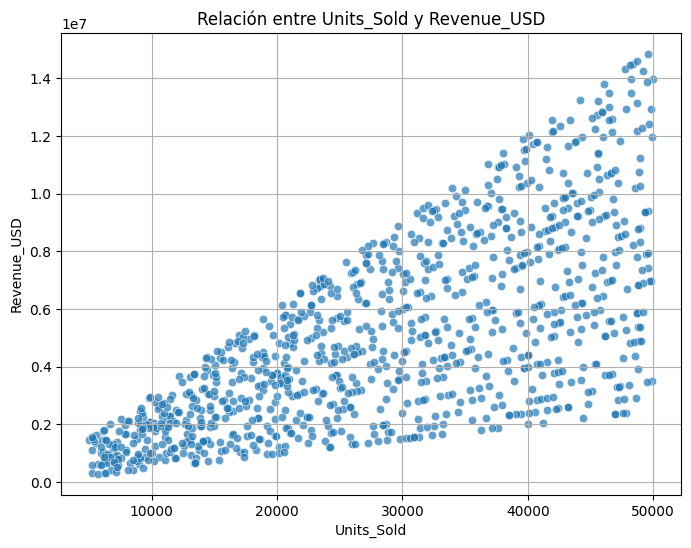

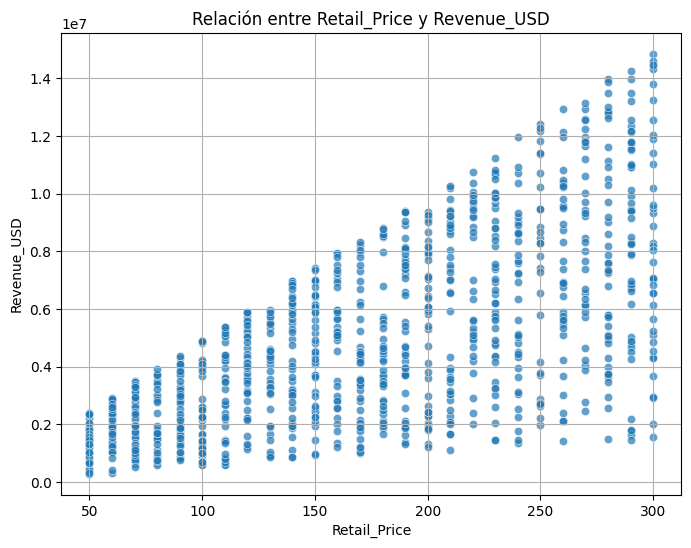

In [34]:
selected_features = ["Units_Sold", "Retail_Price"]
plot_features_num_regression(df_nike, target_col="Revenue_USD", selected_features=selected_features)